In [ ]:
!pip install gwcloud-python bilby

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use('publication')
import h5py
import corner
import os
import json

import glob

In [17]:
from gwcloud_python import GWCloud

### user token -- sign into gwcloud.org.au/auth/api-token.  Token is unique to individuals and provides authentication e.g., to LVC data and cluster resources
gwc = GWCloud(token='Your token goes here') 

In [ ]:
import gwcloud_python

jobs = gwc.get_user_jobs()
GWTC2 = ['GW190701_203306', 'GW190424_180648', 'GW190707_093326', 'GW190828_065509', 'GW190909_114149',
            'GW190728_064510', 'GW190930_133541', 'GW190720_000836', 'GW190731_140936', 'GW190708_232457',
            'GW190706_222641', 'GW190727_060333', 'GW190527_092055', 'GW190602_175927', 'GW190915_235702',
            'GW190620_030421', 'GW190514_065416', 'GW190503_185404', 'GW190803_022701', 'GW190910_112807',
            'GW190521_074359', 'GW190512_180714', 'GW190513_205428', 'GW190719_215514', 'GW190814',
            'GW190412', 'GW190517_055101', 'GW190413_134308', 'GW190421_213856', 'GW190630_185205',
            'GW190828_063405', 'GW190413_052954', 'GW190924_021846', 'GW190929_012149', 'GW190519_153544',
            'GW190426_152155', 'GW190521']
for job in jobs:
    if job.name in GWTC2:
        file_list = gwcloud_python.file_reference.FileReferenceList()
        json_files = job.get_full_file_list().filter_list_by_path(directory='result', extension='json')
        for file in json_files:
            print(file)
            file_list.append(file)
            break
        job.save_files_by_reference(file_list, './GWTC2Posteriors')

In [ ]:
#The JSON files for GWTC-2 events on GWCloud are currently unreadable by bilby. This cell makes them readable.
for file in glob.glob('./GWTC2Posteriors/result/*.json'):
    name = file.split('/')[3][:-14]
    with open(file, 'r') as f:
        event = json.load(f)
        extrinsic_params = ['outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence',
                            'log_bayes_factor']
        for param in extrinsic_params:
            event[param] = 'Data not found'
        os.remove(file)

    with open('./GWTC2Posteriors/result/' + name + '_merge_result.json', 'w') as g:
        json.dump(event, g)
        print(name + '_merge_result.json file created.')

In [18]:
## Import data from GWTC-2 catalogue and process
import glob 
import bilby

approximant = 'C01:IMRPhenomPv2'

m1_TC2 = {}
m2_TC2 = {}

chirp_mass_TC2 = {}
mass_ratio_TC2 = {}
total_mass_TC2 = {}

chi_eff_TC2 = {}
chi_p_TC2 = {}

for file in glob.glob('GWTC2Posteriors/result/*.json'):    
    posterior_file = bilby.core.result.read_in_result(filename=file)
    
    posterior_samples = posterior_file.posterior['mass_1'].values
    
    event = file.split('/')[2][:-18]
        
    m1_TC2[event] = posterior_file.posterior['mass_1_source'].values
    m2_TC2[event] = posterior_file.posterior['mass_2_source'].values
    
    chirp_mass_TC2[event] = posterior_file.posterior['chirp_mass_source'].values
    mass_ratio_TC2[event] = posterior_file.posterior['mass_ratio'].values
    total_mass_TC2[event] = posterior_file.posterior['total_mass_source'].values
    
    chi_eff_TC2[event] = posterior_file.posterior['chi_eff'].values
    chi_p_TC2[event] = posterior_file.posterior['chi_p'].values
    


GWTC2Posteriors/result/GW190915_235702_merge_result.json
GW190915_235702
GWTC2Posteriors/result/GW190924_021846_merge_result.json
GW190924_021846
GWTC2Posteriors/result/GW190521_merge_result.json
GW190521
GWTC2Posteriors/result/GW190503_185404_merge_result.json
GW190503_185404
GWTC2Posteriors/result/GW190814_merge_result.json
GW190814
GWTC2Posteriors/result/GW190803_022701_merge_result.json
GW190803_022701
GWTC2Posteriors/result/GW190701_203306_merge_result.json
GW190701_203306
GWTC2Posteriors/result/GW190421_213856_merge_result.json
GW190421_213856
GWTC2Posteriors/result/GW190828_065509_merge_result.json
GW190828_065509
GWTC2Posteriors/result/GW190719_215514_merge_result.json
GW190719_215514
GWTC2Posteriors/result/GW190602_175927_merge_result.json
GW190602_175927
GWTC2Posteriors/result/GW190727_060333_merge_result.json
GW190727_060333
GWTC2Posteriors/result/GW190720_000836_merge_result.json
GW190720_000836
GWTC2Posteriors/result/GW190513_205428_merge_result.json
GW190513_205428
GWTC2P

In [19]:
from matplotlib.lines import Line2D

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37/lib/python3.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in true_divide


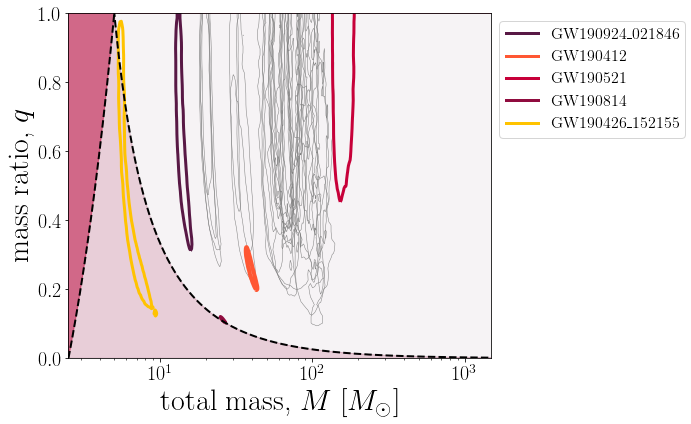

In [29]:
kwargs = dict(bins=50, smooth=0.9, levels = (1-np.exp(-2), ),
            plot_density=False, plot_datapoints=False, fill_contours=False)

for event in m1_TC2:
    corner.hist2d(total_mass_TC2[event], mass_ratio_TC2[event],
                 **kwargs, color='grey', alpha=0.2, contour_kwargs={"linewidths":0.5})
    
BBH = '#581845'
NSBH = '#900C3F'
BNS = '#C70039'
GW190814 = '#FF5733'
RAN = '#FFC300'

corner.hist2d(total_mass_TC2['GW190924_021846'], mass_ratio_TC2['GW190924_021846'],
             **kwargs, color=BBH, contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190924_021846')

corner.hist2d(total_mass_TC2['GW190412'], mass_ratio_TC2['GW190412'],
             **kwargs, color=GW190814, contour_kwargs={"linewidths":4, "linestyles":'-'},
             label='GW190412')

corner.hist2d(total_mass_TC2['GW190521'], mass_ratio_TC2['GW190521'],
             **kwargs, color=BNS, contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190521')

corner.hist2d(total_mass_TC2['GW190814'], mass_ratio_TC2['GW190814'],
             **kwargs, color=NSBH, contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190814')

corner.hist2d(total_mass_TC2['GW190426_152155'], mass_ratio_TC2['GW190426_152155'],
             **kwargs, color=RAN, contour_kwargs={"linewidths":3, "linestyles":'-'}, 
             label='GW190426_152155')


legend_elements = [Line2D([0],[0], color=BBH, lw='3', ls='-', label='GW190924\_021846'),
                   Line2D([0],[0], color=GW190814, lw='3', ls='-', label='GW190412'),
                   Line2D([0],[0], color=BNS, lw='3', ls='-', label='GW190521'),
                   Line2D([0],[0], color=NSBH, lw='3', ls='-', label='GW190814'),
                   Line2D([0],[0], color=RAN, lw='3', ls='-', label='GW190426\_152155')
                    ]


plt.legend(handles=legend_elements, loc = 'upper left', bbox_to_anchor=(1,1), fontsize=16)



neutron_star_mass = 2.5
MM = np.logspace(log10(neutron_star_mass), log10(5000), 10000)
m1_curve = MM / neutron_star_mass - 1
m2_curve = neutron_star_mass / (MM - neutron_star_mass)

plt.plot(MM, m1_curve, 'k--', lw=2)
plt.plot(MM, m2_curve, 'k--', lw=2)

plt.fill_between(MM, m1_curve, 1.0, color=BNS, alpha=0.5)

plt.fill_between(MM, 0.0, m2_curve, color=NSBH, alpha=0.2)

plt.fill_between(MM, m2_curve, 1.0, color=BBH, alpha=0.05)




plt.xlim(2.5,1500)
plt.ylim(0, 1.)
plt.xscale('log')

plt.ylabel('mass ratio, $q$')
plt.xlabel('total mass, $M$ [$M_\odot$]')

plt.tight_layout()

plt.savefig('GWTC12_masses.pdf')
    

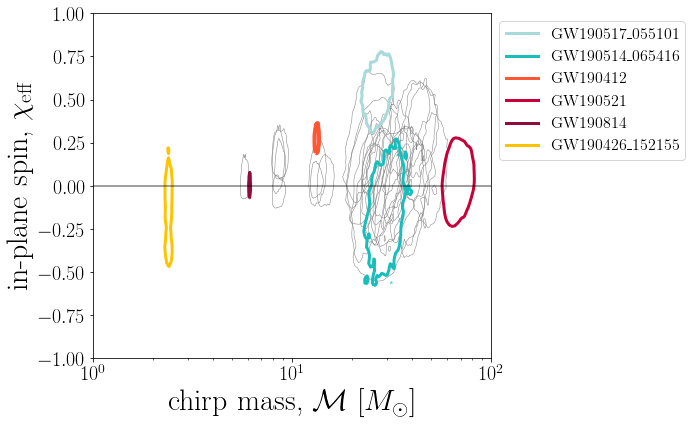

In [37]:
for event in m1_TC2:
    corner.hist2d(chirp_mass_TC2[event], chi_eff_TC2[event], 
                 **kwargs, color='grey', alpha=0.2, contour_kwargs={"linewidths":0.5})


corner.hist2d(chirp_mass_TC2['GW190517_055101'], chi_eff_TC2['GW190517_055101'],
             **kwargs, color='#A8DADC', contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190517_055101')

corner.hist2d(chirp_mass_TC2['GW190514_065416'], chi_eff_TC2['GW190514_065416'],
             **kwargs, color='#17BEBB', contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190514_065416')

"""
corner.hist2d(chirp_mass_TC2['GW190425'], chi_eff_TC2['GW190425'],
             **kwargs, color='#FF5733', contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190425')
"""

corner.hist2d(chirp_mass_TC2['GW190412'], chi_eff_TC2['GW190412'],
             **kwargs, color=GW190814, contour_kwargs={"linewidths":4, "linestyles":'-'},
             label='GW190412')

corner.hist2d(chirp_mass_TC2['GW190521'], chi_eff_TC2['GW190521'],
             **kwargs, color=BNS, contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190521')

corner.hist2d(chirp_mass_TC2['GW190814'], chi_eff_TC2['GW190814'],
             **kwargs, color=NSBH, contour_kwargs={"linewidths":3, "linestyles":'-'},
             label='GW190814')

corner.hist2d(chirp_mass_TC2['GW190426_152155'], chi_eff_TC2['GW190426_152155'],
             **kwargs, color=RAN, contour_kwargs={"linewidths":3, "linestyles":'-'}, 
             label='GW190426_152155')


legend_elements = [Line2D([0],[0], color='#A8DADC', lw='3', ls='-', label='GW190517\_055101'),
                   Line2D([0],[0], color='#17BEBB', lw='3', ls='-', label='GW190514\_065416'),                   
                   Line2D([0],[0], color=GW190814, lw='3', ls='-', label='GW190412'),
                   Line2D([0],[0], color=BNS, lw='3', ls='-', label='GW190521'),
                   Line2D([0],[0], color=NSBH, lw='3', ls='-', label='GW190814'),
                   Line2D([0],[0], color=RAN, lw='3', ls='-', label='GW190426\_152155')
                    ]
#Line2D([0],[0], color='#FF5733', lw='3', ls='-', label='GW190425'),

plt.axhline(0, color='k', alpha=0.5)

plt.ylim(-1,1)
plt.xlim(1, 100)

plt.xscale('log')


plt.legend(handles=legend_elements, loc = 'upper left', bbox_to_anchor=(1,1), fontsize=16)



plt.xlabel('chirp mass, $\mathcal{M}$ [$M_\odot$]')
plt.ylabel(r'in-plane spin, $\chi_{\rm{eff}}$')

plt.tight_layout()

plt.savefig('GWTC12_chieff.pdf')

KeyError: 'GWTC2Posteriors/S190412m.h5'

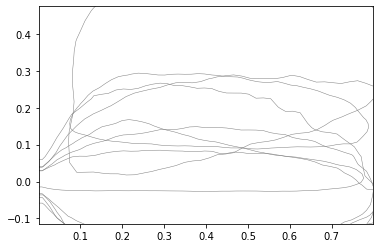

In [10]:
"""
for event in m1_TC1:
    corner.hist2d(chi_p_TC1[event], chi_eff_TC1[event], 
                  **kwargs, color='grey', alpha=0.2, contour_kwargs={"linewidths":0.5})
"""
    
for event in m1_TC2:
    corner.hist2d(np.array(chi_p_TC2[event])[::1], np.array(chi_eff_TC2[event])[::1], 
                 **kwargs, color='grey', alpha=0.2, contour_kwargs={"linewidths":0.5})
    
    
corner.hist2d(np.array(chi_p_TC2['GW190412'])[::1], np.array(chi_eff_TC2['GW190412'])[::1],
             **kwargs, color=BBH, contour_kwargs={"linewidths":3, "linestyles":'--'})


    
corner.hist2d(np.array(chi_p_TC2['GW190517'])[::1], np.array(chi_eff_TC2['GW190517'])[::1],
             **kwargs, color=BBH, contour_kwargs={"linewidths":3, "linestyles":':'})

    
corner.hist2d(np.array(chi_p_TC2['GW190521'])[::1], np.array(chi_eff_TC2['GW190521'])[::1],
             **kwargs, color=BBH, contour_kwargs={"linewidths":3, "linestyles":'-.'})


plt.axhline(0, color='k', alpha=0.5)

plt.ylim(-1,1)
plt.xlim(0, 1)

#plt.xscale('log')

legend_elements = [Line2D([0],[0], color=BBH, lw='3', ls='--', label='GW190412'),
                   Line2D([0],[0], color=BBH, lw='3', ls=':', label='GW190517'),
                   Line2D([0],[0], color=BBH, lw='3', ls='-.', label='GW190521')
                          ]

plt.legend(handles=legend_elements, loc='lower right', fontsize=20)



plt.xlabel(r'precession, $\chi_p$')
plt.ylabel(r'in-plane spin, $\chi_{\rm{eff}}$')

plt.tight_layout()